In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boston.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
df = df[['MEDV','AGE','LSTAT']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
poly = PolynomialFeatures(degree = 5, interaction_only=False, include_bias=False)
sc=MinMaxScaler()
sc=sc.fit(df)
sc1=FunctionTransformer(np.log)
sc1=sc1.fit(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['AGE','LSTAT']].values
X=sc1.fit_transform(X)
X=sc.fit_transform(X)
X=poly.fit_transform(X)
y=df['MEDV'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [6]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

-54.89062255286807
[  165.56743799   890.08451007   253.31030381 -1423.9553093
 -3542.76551804  -739.06042363   299.18075659  3790.70805932
  6115.25043311   378.10002987  1252.55052793 -1601.35769563
 -4813.81440597 -4042.3030415     49.9228405   -967.54993939
   836.7119561   -236.17131247  2998.85827987   405.37147476]


In [7]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  0.4521752145606558
Mean Absolute Error: 3.4022754085301865
Mean Squared Error: 36.255093269719374
Root Mean Squared Error: 6.021220247567712
Mean Absolute percentage Error: 0.18472327712732864


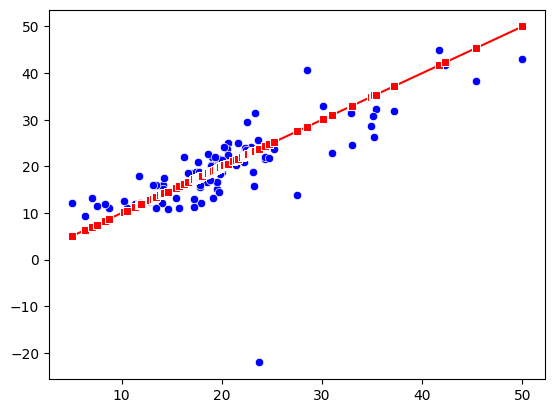

In [8]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [9]:
y_test_pred=model.predict(X_test)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_test','LSTAT_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,AGE_test,LSTAT_test,y_test,y_test_predicted,Residual
0,1.000000,0.470107,23.3,31.428176,-8.128176
1,0.982223,0.836003,12.8,12.562707,0.237293
2,0.929097,0.923398,6.3,9.366606,-3.066606
3,0.814211,0.432520,35.2,26.405330,8.794670
4,0.995444,0.690333,17.1,18.529789,-1.429789
...,...,...,...,...,...
97,0.965175,0.691662,17.7,18.787881,-1.087881
98,0.617339,0.567058,19.3,22.045851,-2.745851
99,0.985215,0.815108,15.4,13.201128,2.198872
100,0.986699,0.699953,18.4,18.156486,0.243514


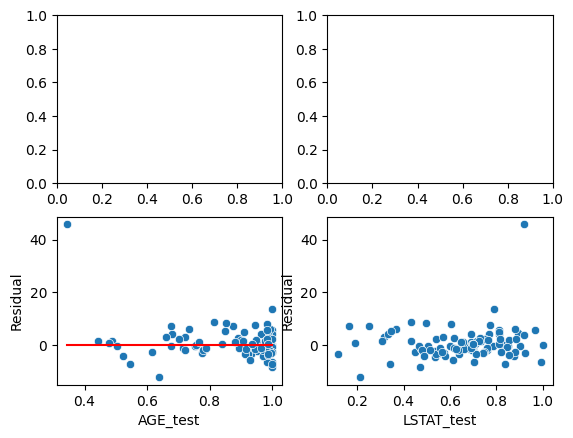

In [10]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,1])
plt.show()

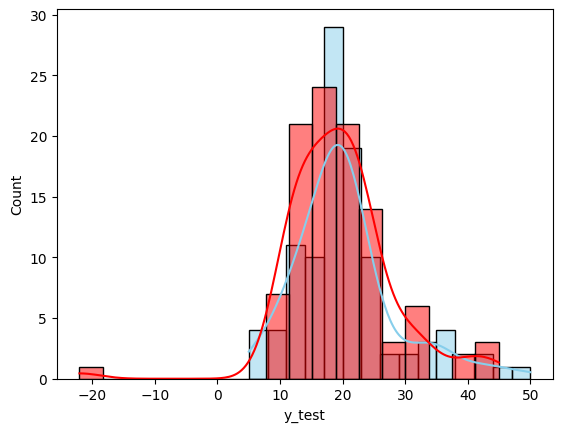

In [11]:
sns.histplot(data=dfTestValidation,x='y_test',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True)
plt.show()

In [12]:
import numpy as np
from sklearn import metrics
y_train_pred=model.predict(X_train)
print('Score or R-squared: ',model.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_train, y_train_pred)) 

Score or R-squared:  0.7215302992488921
Mean Absolute Error: 3.4552758768102296
Mean Squared Error: 24.35279764604163
Root Mean Squared Error: 4.934855382485046
Mean Absolute percentage Error: 0.1632964952510765


In [13]:
y_train_pred=model.predict(X_train)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_train','LSTAT_train','y_train','y_train_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']
dfTestValidation

,AGE_train,LSTAT_train,y_train,y_train_predicted,Residual
0,1.000000,0.470107,23.3,31.428176,-8.128176
1,0.982223,0.836003,12.8,12.562707,0.237293
2,0.929097,0.923398,6.3,9.366606,-3.066606
3,0.814211,0.432520,35.2,26.405330,8.794670
4,0.995444,0.690333,17.1,18.529789,-1.429789
...,...,...,...,...,...
97,0.965175,0.691662,17.7,18.787881,-1.087881
98,0.617339,0.567058,19.3,22.045851,-2.745851
99,0.985215,0.815108,15.4,13.201128,2.198872
100,0.986699,0.699953,18.4,18.156486,0.243514


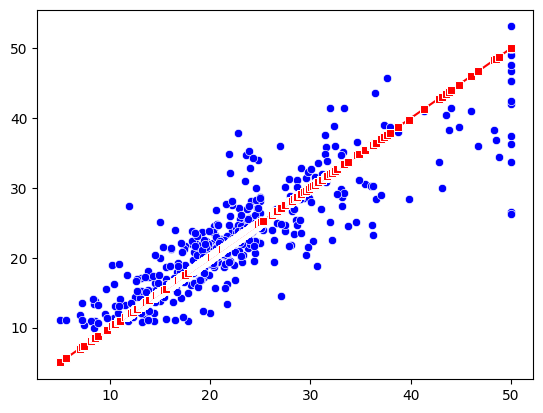

In [14]:
import seaborn  as sns
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),marker='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),marker='o',color='b')
plt.show()

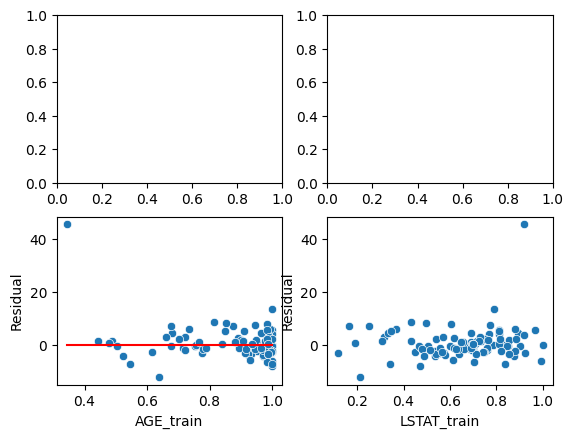

In [15]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_train',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_train',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_train',y='Residual',ax=axes[1,1])
plt.show()

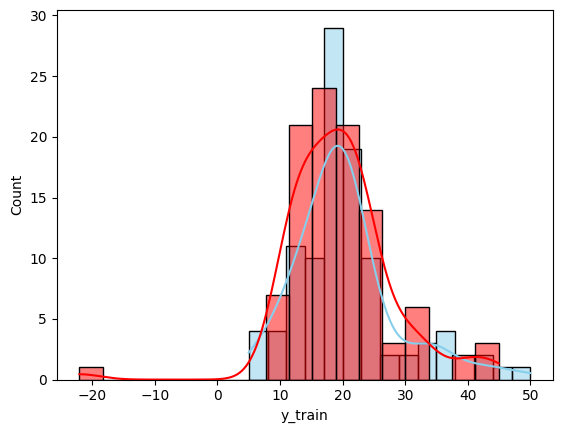

In [16]:
sns.histplot(data=dfTestValidation,x='y_train',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_train_predicted',color="red",label="Forecast",kde=True)
plt.show()